In [29]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
import matplotlib.gridspec as gridspec
from magpie_data import NeLMap2
from mcerp import N, umath

def ne_mean(s, L, d):
    #returns average density inside a rectangle centered on the origin
    tl=s.mm_to_px((L,-d))
    br=s.mm_to_px((-L,d))
    return s.data_c[tl[0]:br[0], tl[1]:br[1]].mean()

def print_N(N):
    print(N.mean, N.std)

# Get V_y from pressure

In [53]:
T_e=N(100,10)
T_i=N(600,30)
Z=6
A=12
C_IA=1e-2*9.79e5*A**-0.5*(Z*T_e+T_i)**0.5
B=N(3,0.3)
n_e=N(3e17, 0.3e17)
n_i=n_e/Z
V_A=1e-2*2.18e11*A**-0.5*n_i**-0.5*B
V_y=(V_A**2+2*C_IA**2)**0.5
print_N(V_y)

138398.09201 3853.29439413


In [54]:
L=N(7,1)*1e-3
t=20e-9
d=N(0.6,0.05)*1e-3

# s1006_15

In [44]:
%cd "~\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow


In [45]:
s1006_15_532=NeLMap2('s1006_15 532nm neL.txt', scale=173, multiply_by=1/1.6, rot_angle=-90)
s1006_15_532.set_origin(origin=(2328,1421), extent=[-11.5,11.5,-8,8])
s1006_15_355=NeLMap2('s1006_15 355nm neL.txt', scale=128, multiply_by=2/1.6, rot_angle=-90,flip_lr=True)
s1006_15_355.set_origin(origin=(1680,1113), extent=[-11.5,11.5,-8,8])

In [55]:
#start with the time we want to evaulate at
s=s1006_15_532

l=1 #l is only 2 mm to avoid confusion with diverging flows
dd=0.6 #use some none normal variables for actually working with

#tl, br of box
tl=s.mm_to_px((l,-dd))
bl=s.mm_to_px((-l,-dd))

tr=s.mm_to_px((l,dd))
br=s.mm_to_px((-l,dd))

#centre of box, along the reconnection layer
tc=s.mm_to_px((l,0))
bc=s.mm_to_px((-l,0))

#get left and right box edge densities and average the,
n_e1l=s.data_c[tl[0]:bl[0], tl[1]].mean()
n_e1r=s.data_c[tr[0]:br[0], tr[1]].mean()

n_e1=(n_e1l+n_e1r)/2
Z_in=4
n1=n_e1/Z_in #ion density on edge of layer

n_e2=s.data_c[tc[0]:bc[0], tc[1]].mean()
Z_l=6
n2=n_e2/Z_l #ion density in centre layer

#get the later time to estimate time rate of change inside layer.
s=s1006_15_355
tc=s.mm_to_px((l,0))
bc=s.mm_to_px((-l,0))

n_e2p=s.data_c[tc[0]:bc[0], tc[1]].mean()
n2p=n_e2p/Z_l #ion density 20 ns later in centre of layer

V_c=L/n1*(n2p-n2)/t
V_x=(d/L)*(V_y*n2/n1+V_c)

In [23]:
n1,n2, n2p

(92276772489161824.0, 1.1713934248554926e+17, 1.6616086425781248e+17)

In [57]:
print_N(V_c)

185935.15697 26562.3652209


In [41]:
d/L*(n_i_out/n_i_in*V_y+L/n_i_in*)

uv(0.0875995047296, 0.000236781324606, 0.863150858287, 4.64689153304)

In [18]:
ne0=ne_mean(s1006_15_532, l,dd)
ne1=ne_mean(s1006_15_355, l,dd)
V_c=L/ne0*(ne1-ne0)/t #use ne0 to evaluate at t0.
V_x=d/L*(V_y+V_c)
print_N(V_x)

33283.5270242 3391.45785962


In [42]:
n_i_out/n_i_in*V_y

uv(145613.1137, 27039961.2456, -0.00190301461517, 2.99544856093)

<IPython.core.display.Javascript object>


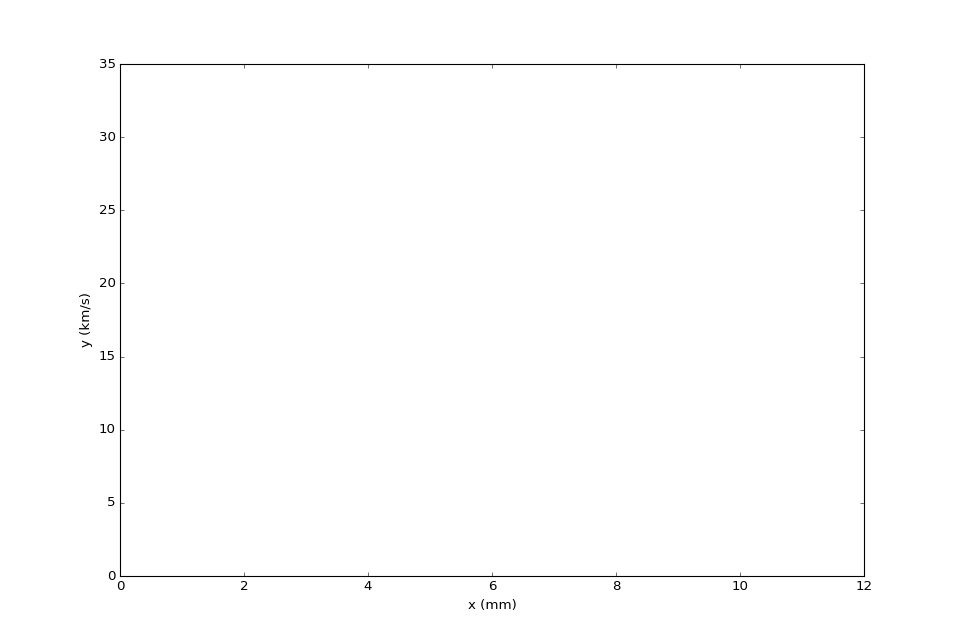

In [146]:
fig, ax=plt.subplots(figsize=(12,8))
ax.errorbar(ll, V_xm, yerr=V_xerr,fmt='o')
ax.set_xlim([0,12])
ax.set_xlabel('x (mm)')
ax.set_ylim([0,35])
ax.set_ylabel('y (km/s)')

In [143]:
fig.savefig('Inflow velocity vs length of region.png')

In [24]:
cd "~\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns


In [25]:
s1026_15_532=NeLMap2('s1026_15 532nm neL.txt', scale=173, rot_angle=-90)
s1026_15_532.set_origin(origin=(2377,1438), extent=[-11.5,11.5,-8,8])
s1026_15_355=NeLMap2('s1026_15 355nm neL.txt', scale=128, multiply_by=2, rot_angle=-90, flip_lr=True)
s1026_15_355.set_origin(origin=(1540,1110), extent=[-11.5,11.5,-8,8])

In [144]:
ne0=ne_mean(s1026_15_532, L,d)
ne1=ne_mean(s1026_15_355, L,d)
nehalf=(ne0+ne1)/2
V_c=L/nehalf*(ne1-ne0)/t
V_x=d/L*(V_y+V_c)
print_N(V_x)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'UncertainFunction'

In [147]:
V_xm=[]
V_xerr=[]
ll=np.arange(2,12,2)
for l in ll:    
    ne0=ne_mean(s1026_15_532, l,dd)
    ne1=ne_mean(s1026_15_355, l,dd)
    nehalf=(ne0+ne1)/2
    V_c=L/nehalf*(ne1-ne0)/t
    V_x=d/L*(V_y+V_c)
    V_xm.append(V_x.mean*1e-3)#
    V_xerr.append(V_x.std*1e-3)

<IPython.core.display.Javascript object>


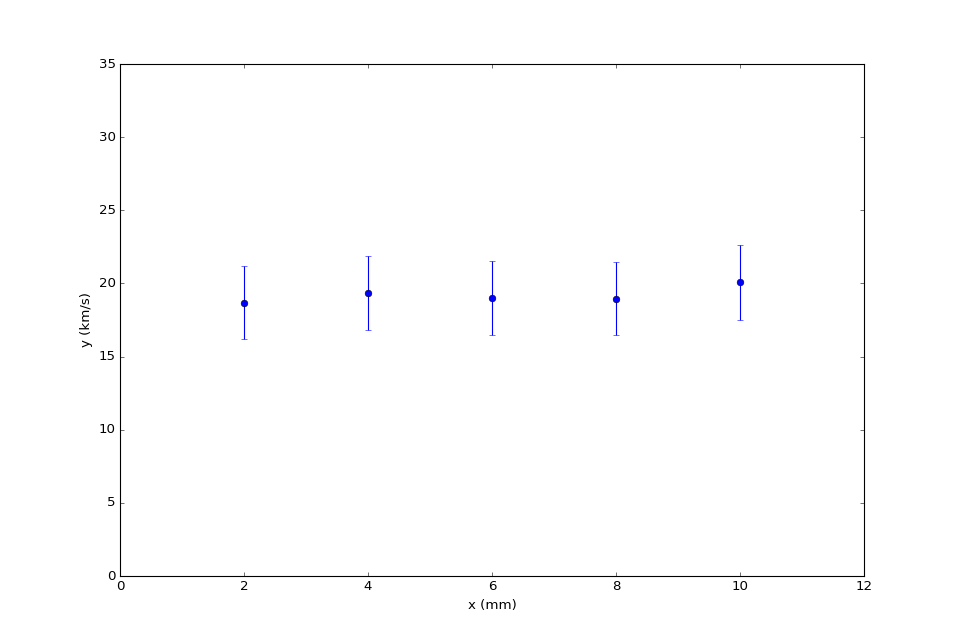

In [148]:
fig, ax=plt.subplots(figsize=(12,8))
ax.errorbar(ll, V_xm, yerr=V_xerr,fmt='o')
ax.set_xlim([0,12])
ax.set_xlabel('x (mm)')
ax.set_ylim([0,35])
ax.set_ylabel('y (km/s)')